### PREPROCESSING & EDA

#### Importing Libraries & Data
#### Dealing with Duplicates and Nan
#### Looking at correlations(相關性)
#### Data Normalization (Plots & Tests)

### MODELING

#### Baseline Models with 10-Folds CV
#### Best Model (RandomGridSearch)
#### Prediction
#### Submission

In [1396]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

from scipy.stats import norm
from sklearn import metrics
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings(action="ignore")

In [1397]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
test_data=test_data.drop("Id",axis=1)

In [1398]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [1399]:
train_data.shape,test_data.shape

((1460, 81), (1459, 79))

In [1400]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [1401]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

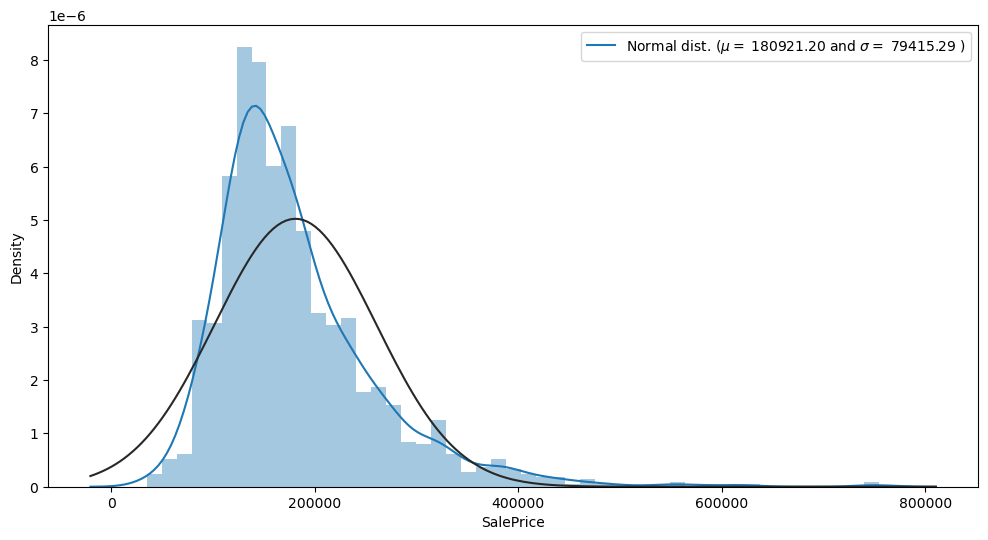

In [1402]:
#(mean,std)   去.info看
(mu,sigma)=norm.fit(train_data['SalePrice'])
# mu
plt.figure(figsize=(12,6))
sns.distplot(train_data['SalePrice'],kde=True,hist=True,fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')

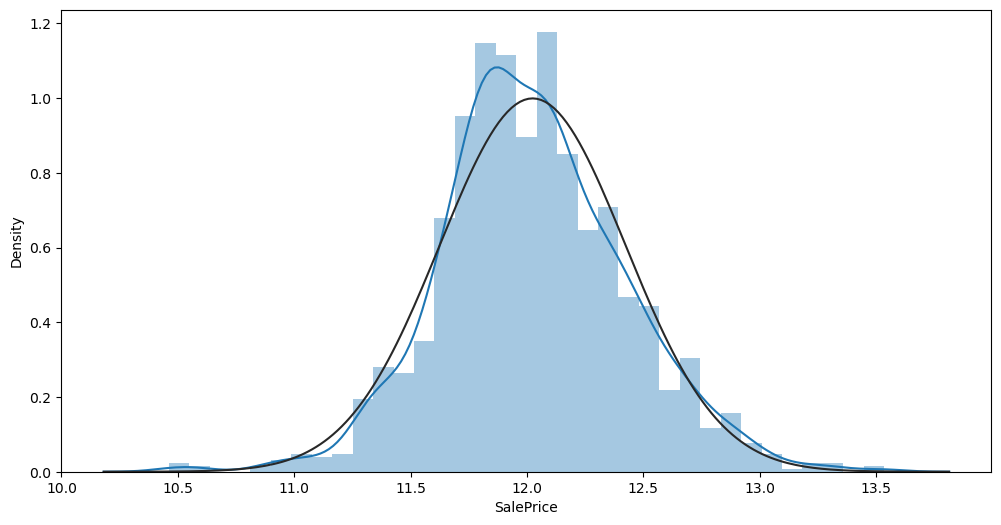

In [1403]:
train_data['SalePrice']=np.log1p(train_data['SalePrice'])
plt.figure(figsize=(12,6))
sns.distplot(train_data['SalePrice'],kde=True,hist=True,fit=norm)
plt.savefig("金額高斯分布")

In [1404]:
a=[]
a=df_train.columns
for i in a:
    if df_train[i].dtype!=object:
        kurtious=round(df_train[i].kurt(),2)
        skew=round(df_train[i].skew(),2)
        print(f"{i}  {kurtious}  {skew}")

Id  -0.62  0.93
LotFrontage  9.45  1.23
LotArea  275.19  13.11
OverallQual  0.06  0.19
OverallCond  1.47  0.58
YearBuilt  -0.51  -0.6
YearRemodAdd  -1.35  -0.45
MasVnrArea  9.47  2.63
BsmtFinSF1  1.43  0.98
BsmtFinSF2  18.83  4.15
BsmtUnfSF  0.4  0.92
TotalBsmtSF  3.72  0.67
1stFlrSF  5.09  1.26
2ndFlrSF  -0.43  0.86
LowQualFinSF  184.89  12.4
GrLivArea  2.45  1.07
BsmtFullBath  -0.75  0.62
BsmtHalfBath  14.81  3.93
FullBath  -0.54  0.17
HalfBath  -1.03  0.69
BedroomAbvGr  1.94  0.33
KitchenAbvGr  19.72  4.3
TotRmsAbvGrd  1.15  0.75
Fireplaces  0.04  0.73
GarageYrBlt  2.1  -0.4
GarageCars  0.24  -0.22
GarageArea  0.87  0.22
WoodDeckSF  6.75  1.84
OpenPorchSF  11.0  2.53
EnclosedPorch  28.74  4.03
3SsnPorch  149.04  11.37
ScreenPorch  17.72  3.94
PoolArea  326.46  17.68
MiscVal  562.72  21.93


In [1405]:
s=df_train['GrLivArea'].sort_values(ascending = False)
s.head(10)

2542    5095
1177    4476
686     4316
2181    3820
2815    3672
1164    3627
183     3608
2675    3500
302     3493
1263    3447
Name: GrLivArea, dtype: int64

In [1406]:
train_data = train_data[train_data.GrLivArea < 4500]
# train_data.iloc[[30,88,462,631,1322]]
train_data=train_data.drop(train_data.index[[30,88,462,631,1322]])

In [1407]:
df=train_data.append(test_data,ignore_index=False).reset_index()
df=df.drop("index",axis=1)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1453.0,731.015829,421.236381,1.000000,366.000000,732.000000,1095.000000,1460.000000
MSSubClass,2912.0,57.172047,42.551066,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,2426.0,69.168590,22.796944,21.000000,59.000000,68.000000,80.000000,313.000000
LotArea,2912.0,10140.661745,7813.473386,1300.000000,7466.500000,9452.500000,11557.750000,215245.000000
OverallQual,2912.0,6.087569,1.405524,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,2912.0,5.567308,1.111881,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,2912.0,1971.313187,30.272860,1872.000000,1953.750000,1973.000000,2001.000000,2010.000000
YearRemodAdd,2912.0,1984.262019,20.892776,1950.000000,1965.000000,1993.000000,2004.000000,2010.000000
MasVnrArea,2889.0,101.689166,178.520298,0.000000,0.000000,0.000000,164.000000,1600.000000
BsmtFinSF1,2911.0,439.297149,444.278401,0.000000,0.000000,368.000000,733.000000,4010.000000


In [1408]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

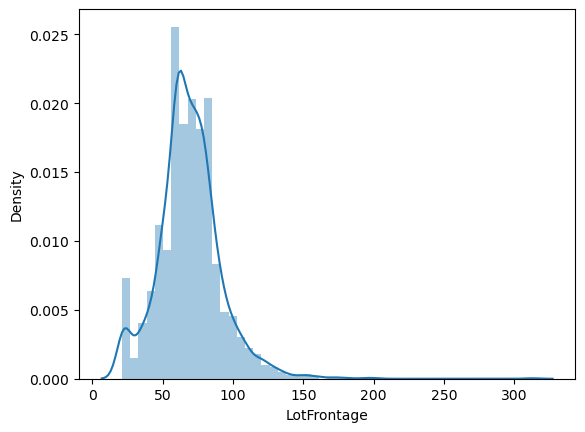

In [1409]:
sns.distplot(df.LotFrontage)

In [1410]:
df.loc[df.LotFrontage.isnull()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8.0,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,12.206078
12,13.0,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,11.877576
14,15.0,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,11.964007
16,17.0,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,11.911708
24,25.0,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,11.944714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,NaN,20,RL,NaN,11088,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2843,NaN,60,RL,NaN,21533,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,NaN
2893,NaN,20,RL,NaN,50102,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Alloca,NaN
2894,NaN,20,RL,NaN,8098,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,NaN


In [1411]:
df.loc[df.LotFrontage.isnull()==True,'LotFrontage']=round(df.LotFrontage.mean(),2)
df.loc[12]

Id                    13.0
MSSubClass              20
MSZoning                RL
LotFrontage          69.17
LotArea              12968
                   ...    
MoSold                   9
YrSold                2008
SaleType                WD
SaleCondition       Normal
SalePrice        11.877576
Name: 12, Length: 81, dtype: object

## 處理缺失值

In [1412]:
a=df.isnull().sum()
d=[]
for value in a.items():
    if value[1]>0:
        d.append(value)
x=pd.DataFrame(d)
x

,0,1
0,Id,1459
1,MSZoning,4
2,Alley,2715
3,Utilities,2
4,Exterior1st,1
5,Exterior2nd,1
6,MasVnrType,24
7,MasVnrArea,23
8,BsmtQual,81
9,BsmtCond,82


In [1413]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [1414]:
df['GarageCars'].value_counts()
df['GarageCars']=df['GarageCars'].fillna(0)

In [1415]:
#缺失大於2000
df.drop(['Utilities','Street','Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df.shape

(2912, 75)

In [1416]:
df['BsmtQual']=df['BsmtQual'].fillna('NA')
df['BsmtCond']=df['BsmtCond'].fillna('NA')
df['BsmtExposure']=df['BsmtExposure'].fillna('NA')
df['BsmtFinType1']=df['BsmtFinType1'].fillna('NA')
df['BsmtFinType2']=df['BsmtFinType2'].fillna('NA')

In [1417]:
df['MasVnrType'].value_counts()

None       1739
BrkFace     877
Stone       247
BrkCmn       25
Name: MasVnrType, dtype: int64

In [1418]:
#1742 None 缺值補none
df.loc[df['MasVnrType'].isnull()==True,'MasVnrType']='None'

In [1419]:
df['MasVnrArea'].describe()

count    2889.000000
mean      101.689166
std       178.520298
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [1420]:
#一半都是0 缺值補0
df.loc[df.MasVnrArea.isnull()==True,'MasVnrArea']=0.0
# df['MasVnrArea'].isnull().sum()

In [1421]:
df['GarageType']=df['GarageType'].fillna('NA')
df['GarageFinish']=df['GarageFinish'].fillna('NA')
df['GarageQual']=df['GarageQual'].fillna('NA')
df['GarageCond']=df['GarageCond'].fillna('NA')

In [1422]:
df['GarageYrBlt'].median()
df.loc[df['GarageYrBlt'].isnull()==True,'GarageYrBlt']=1979.0

In [1423]:
df.Electrical.value_counts()
df['Functional'] = df['Functional'].fillna('Typ') #空值填充为str型数据'Typ'
df['KitchenQual'] = df['KitchenQual'].fillna("TA") #
df.loc[df['Electrical'].isnull()==True,'Electrical']='SBrkr'

In [1424]:
df.loc[df['FireplaceQu'].isnull()==True,'FireplaceQu']='NA'

In [1425]:
#補眾數
df['Exterior1st'].mode()[0]
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

In [1426]:
df_train=df.drop("SalePrice",axis=1)
rem=df[["Id","SalePrice"]]
df_train=df_train.fillna(0)
df=pd.merge(df_train,rem,how="left")
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 75, dtype: int64

In [1427]:
a=df.isnull().sum()
for value in a.items():
    if value[1]>0:
        print(value)

('SalePrice', 1459)


## encodeing

In [1428]:
data_object = df.select_dtypes(include = "object").columns
data_num = df.select_dtypes(include = ["int","float"]).columns
print (data_object)
print(data_num)

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       

In [1429]:
from sklearn.preprocessing import LabelEncoder

for features in data_object:
    df[features] = LabelEncoder().fit_transform(df[features].astype(str))

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,10,4,65.0,8450,3,3,4,0,5,...,0,0,0,0,0,4,2,8,4,12.247699
1,2.0,5,4,80.0,9600,3,3,2,0,24,...,0,0,0,0,0,7,1,8,4,12.109016
2,3.0,10,4,68.0,11250,0,3,4,0,5,...,0,0,0,0,0,11,2,8,4,12.317171
3,4.0,11,4,60.0,9550,0,3,0,0,6,...,272,0,0,0,0,4,0,8,0,11.849405
4,5.0,10,4,84.0,14260,0,3,2,0,15,...,0,0,0,0,0,3,2,8,4,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,0.0,2,5,21.0,1936,3,3,4,0,10,...,0,0,0,0,0,8,0,8,4,NaN
2908,0.0,2,5,21.0,1894,3,3,4,0,10,...,0,0,0,0,0,6,0,8,0,NaN
2909,0.0,5,4,160.0,20000,3,3,4,0,11,...,0,0,0,0,0,11,0,8,0,NaN
2910,0.0,14,4,62.0,10441,3,3,4,0,11,...,0,0,0,0,700,9,0,8,4,NaN


In [1430]:
x=df.drop(['Id','SalePrice'],axis=1) 

In [1431]:
scaled_x=MinMaxScaler().fit_transform(x)

In [1432]:
train_df = df[df['SalePrice'].notnull()].reset_index(drop=True)
test_df = df[df['SalePrice'].isnull()]
# y=train_df['SalePrice']
# train_df=train_df.drop(["Id","SalePrice"],axis=1)
# test_df=test_df.drop(["Id","SalePrice"],axis=1)

In [1433]:
y = train_df['SalePrice']
X = train_df.drop(["Id", "SalePrice"], axis=1)

y_test = test_df['SalePrice'] 
X_test = test_df.drop(["Id", "SalePrice"], axis=1)

## Model

In [1434]:
# X_train,X_test,y_train,y_test = train_test_split(train_df,y,test_size=0,random_state=42)

In [1435]:
XGB=XGBRegressor(learning_rate=0.01,n_estimators=3460,max_depth=4, min_child_weight=1,gamma=0, subsample=0.7,colsample_bytree=0.7,objective='reg:squarederror',scale_pos_weight=1, seed=27,reg_alpha=0.00006).fit(X,y)

([<matplotlib.axis.YTick at 0x1dd14011eb0>,
 [Text(0, 0, '3SsnPorch'),
  Text(0, 1, 'LotConfig'),
  Text(0, 2, 'Electrical'),
  Text(0, 3, 'MasVnrArea'),
  Text(0, 4, 'MSSubClass'),
  Text(0, 5, 'BsmtFinType2'),
  Text(0, 6, 'MiscVal'),
  Text(0, 7, 'BsmtUnfSF'),
  Text(0, 8, 'MasVnrType'),
  Text(0, 9, 'RoofMatl'),
  Text(0, 10, 'MoSold'),
  Text(0, 11, 'Exterior2nd'),
  Text(0, 12, 'BsmtHalfBath'),
  Text(0, 13, 'LotFrontage'),
  Text(0, 14, 'BldgType'),
  Text(0, 15, 'EnclosedPorch'),
  Text(0, 16, 'LotShape'),
  Text(0, 17, 'YrSold'),
  Text(0, 18, 'FireplaceQu'),
  Text(0, 19, 'HouseStyle'),
  Text(0, 20, 'LandContour'),
  Text(0, 21, 'SaleType'),
  Text(0, 22, 'LowQualFinSF'),
  Text(0, 23, 'BsmtFinSF2'),
  Text(0, 24, 'Foundation'),
  Text(0, 25, 'GarageFinish'),
  Text(0, 26, 'Exterior1st'),
  Text(0, 27, 'BedroomAbvGr'),
  Text(0, 28, 'WoodDeckSF'),
  Text(0, 29, 'RoofStyle'),
  Text(0, 30, 'LandSlope'),
  Text(0, 31, 'HeatingQC'),
  Text(0, 32, 'Neighborhood'),
  Text(0, 33, 

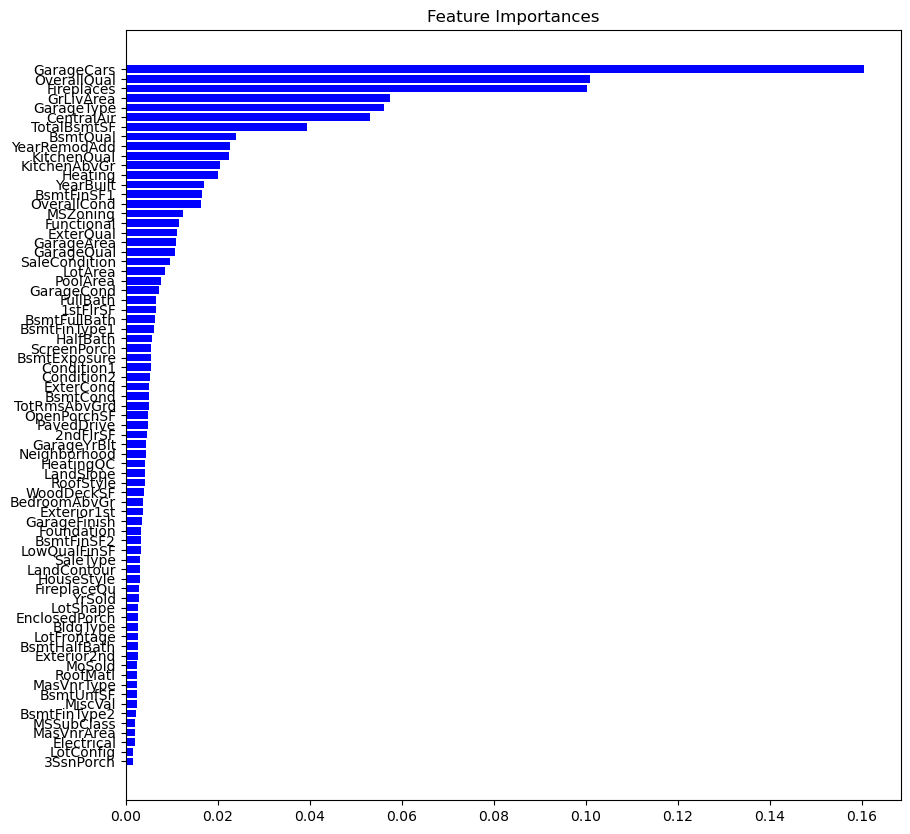

In [1436]:
importances = XGB.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices] , color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])

In [1437]:
xtest_XGB_pred=XGB.predict(X_test)
xx=XGB.predict(X)

## 訓練資料結果

In [1438]:
xx=np.expm1(xx)
y=np.expm1(y)
# plt.figure(figsize=(12,6))
# sns.distplot(xx,kde=True,hist=True)

In [1439]:
train_predict = pd.DataFrame({'predict':xx , 'correct_price': y})
train_predict

,predict,correct_price
0,206070.828125,208500.0
1,180209.703125,181500.0
2,216272.875000,223500.0
3,144156.968750,140000.0
4,269476.468750,250000.0
...,...,...
1448,173984.078125,175000.0
1449,203733.531250,210000.0
1450,263559.062500,266500.0
1451,140695.390625,142125.0


In [1440]:
mean_squared_error(y,xx),mean_absolute_error(y,xx)

(27540855.02149852, 3793.454041745529)

In [1441]:
sqrt(mean_squared_error(y,xx))

5247.9381686047445

In [1442]:
mean_squared_log_error(y,xx)

0.0007887355297250775

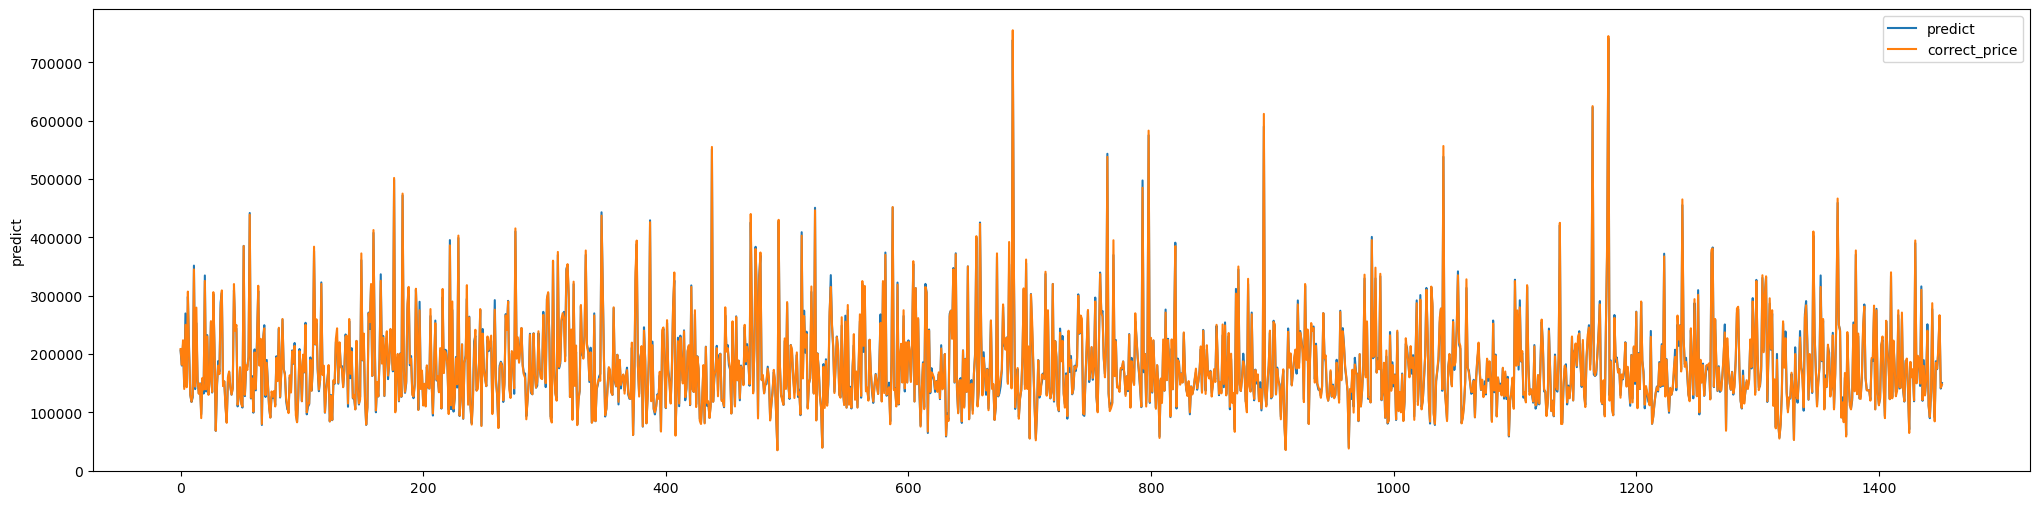

In [1459]:
plt.figure(figsize=(25,6))
sns.lineplot(data=train_predict.predict,label="predict")
sns.lineplot(data=train_predict.correct_price,label="correct_price")
plt.savefig("訓練資料預測結果")

## 測試資料預測

In [1443]:
xtest_XGB_pred=np.expm1(xtest_XGB_pred)

In [1444]:
my_submission = pd.DataFrame({'Id': test_df.index+8, 'SalePrice': xtest_XGB_pred})

In [1445]:
my_submission

,Id,SalePrice
0,1461,124888.859375
1,1462,165646.640625
2,1463,189980.890625
3,1464,193359.906250
4,1465,186294.062500
...,...,...
1454,2915,78192.140625
1455,2916,78923.578125
1456,2917,157816.921875
1457,2918,113921.460938


In [1446]:
my_submission.to_csv('submission.csv', index=False)